#### Nomes:
- Gabriel Vinicius Pagnan
- Leonardo Alves Costa
- Rafael Cesar Ferreira
- Rafael Malaquias Chioca

## Bibliotecas iniciais do script de pré-processamento

- Pandas: análise de dados
- NumPy: para operações matemáticas
- requests: realiza requisições
- json: manipulação de dados em formato json

In [1]:
import pandas as pd
import numpy as np
import requests
import json
import joblib

# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Dataset/new_fraud_dataset.csv', sep=',')

Trecho que realiza a requisição do dataset disponibilizado pela api, local ou em nuvem.

In [ ]:
# response = requests.get('http://localhost:8000/dataset/new_fraud_dataset.csv').content

Manipulação do resultado da requisição, arquivo disponibilizado em json. Utilizando a lib json para fazer um load do arquivo.
E o pandas para fazer a leitura do json e retornando em formato tabelar.

In [ ]:
# data = json.loads(response.decode('utf-8'))

# df = pd.read_json(data)
df.head()

Forma simplificada de trazer um count de dados null presentes nas colunas do dataset.

In [ ]:
df.isnull().sum()

Verifica no dataframe se existe pelo menos um valor null.

In [ ]:
idxRowNan = pd.isnull(df).any(axis=1).to_numpy().nonzero()

display(df.iloc[idxRowNan])

## Tratamento de dados inconsistentes ou redundantes

Verifica as colunas no dataframe

In [ ]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

Verifica as types das colunas no dataframe

In [ ]:
df.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                   float64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [ ]:
df.shape

(285719, 23)

Verificação se existe algum valor duplicado no dataset. Caso aja, retorna um array contendo os valores.

In [ ]:
df_duplicates = df[ df.duplicated(subset=['trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],keep=False)]

if len(df_duplicates)>0:
    display(df_duplicates)
else:
    print('Não existem valores duplicados')

Não existem valores duplicados


Forma simplificada onde retorna um count de valores duplicados.

In [ ]:
df.duplicated().sum()

0

Trecho onde realiza um drop das colunas desnecessárias contidas no dataset.

In [ ]:
#drop columns
df = df.drop(columns=['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'first', 'last', 'street', 'zip', 'trans_num', 'dob'])
df.head()

,merchant,category,amt,gender,city,state,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,fraud_Kirlin and Sons,personal_care,2.86,M,Columbia,SC,33.9659,-80.9355,333497,Mechanical engineer,1371816865,33.986391,-81.200714,0
1,fraud_Haley Group,misc_pos,60.05,M,Titusville,FL,28.5697,-80.8191,54767,Set designer,1371816915,28.812398,-80.883061,0
2,fraud_Reichel LLC,personal_care,10.37,F,Spencer,SD,43.7557,-97.5936,343,"Development worker, international aid",1371816950,44.495498,-97.728453,0
3,"fraud_Goyette, Howell and Collier",shopping_pos,4.37,M,Morrisdale,PA,41.0001,-78.2357,3688,Advice worker,1371816970,41.546067,-78.120238,0
4,"fraud_Feil, Hilpert and Koss",food_dining,7.01,M,Westport,KY,38.4921,-85.4524,564,Pensions consultant,1371816980,38.977546,-84.727994,0


In [ ]:
df.shape

(285719, 14)

## Distribuição de classes

Importação das bibliotecas necessárias.

- Seaborn: Visualização de dados estatísticos
- matplotlib: Visualização de dados

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

is_fraud
0    283574
1      2145
Name: count, dtype: int64

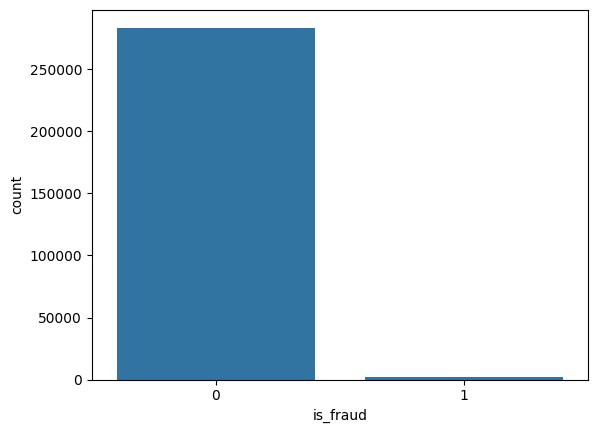

In [ ]:
display(df['is_fraud'].value_counts())

# cria um gráfico de barras com a frequência de cada classe
sns.countplot(x="is_fraud", data=df)

# mostra o gráfico
plt.show()

## Pré-processamento: detecção de *outliers*

Gera um bloxplot para cada atributo

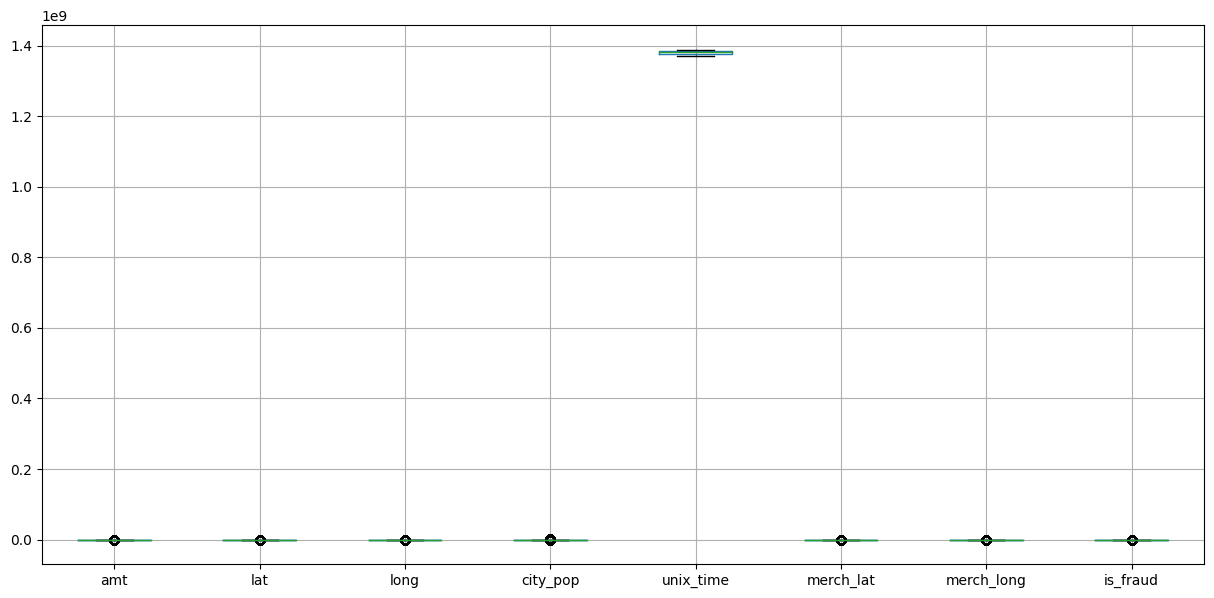

In [ ]:
df.boxplot(figsize=(15,7))
plt.show()

Gera uma matrix de disperção para cada atributo

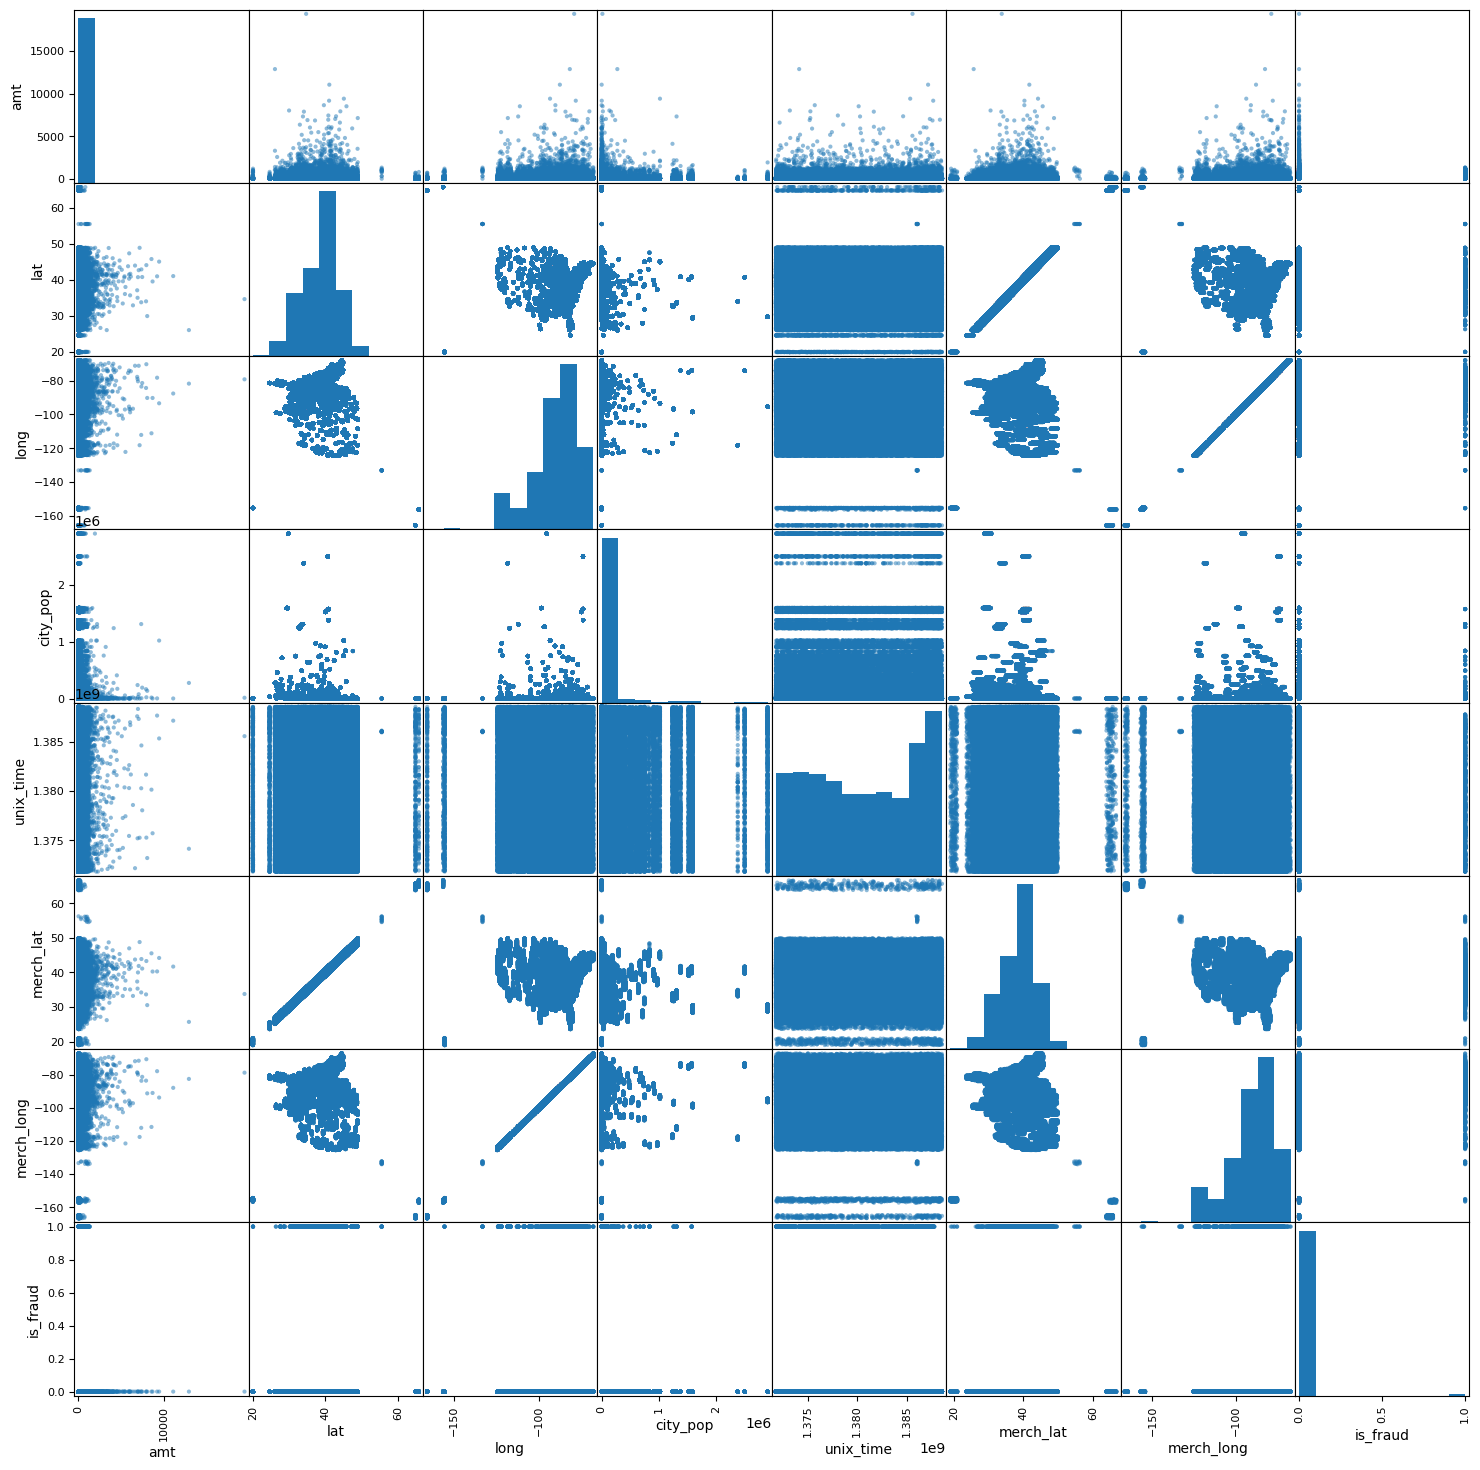

In [ ]:
pd.plotting.scatter_matrix(df, figsize=(18,18))
plt.show()


Matriz de gráficos scatter

In [ ]:
sns.pairplot(df, hue='is_fraud', height=3.5);
plt.show()

Output hidden; open in https://colab.research.google.com to view.

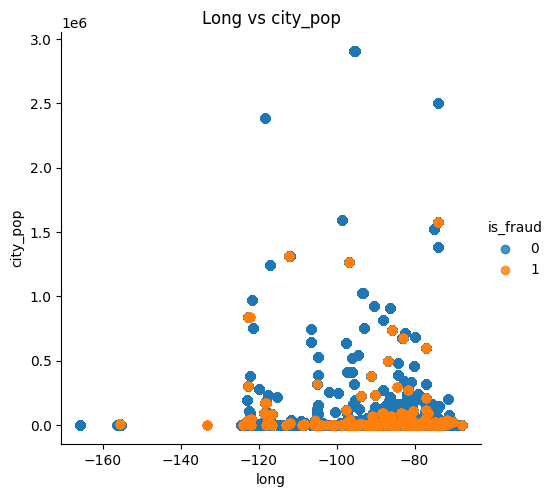

In [ ]:
# define o scatter plot
sns.lmplot(x='long', y='city_pop', data=df,
          fit_reg=False,
          hue='is_fraud')

# cria um título para o gráfico
plt.title('Long vs city_pop')

# mostra o gráfico
plt.show()

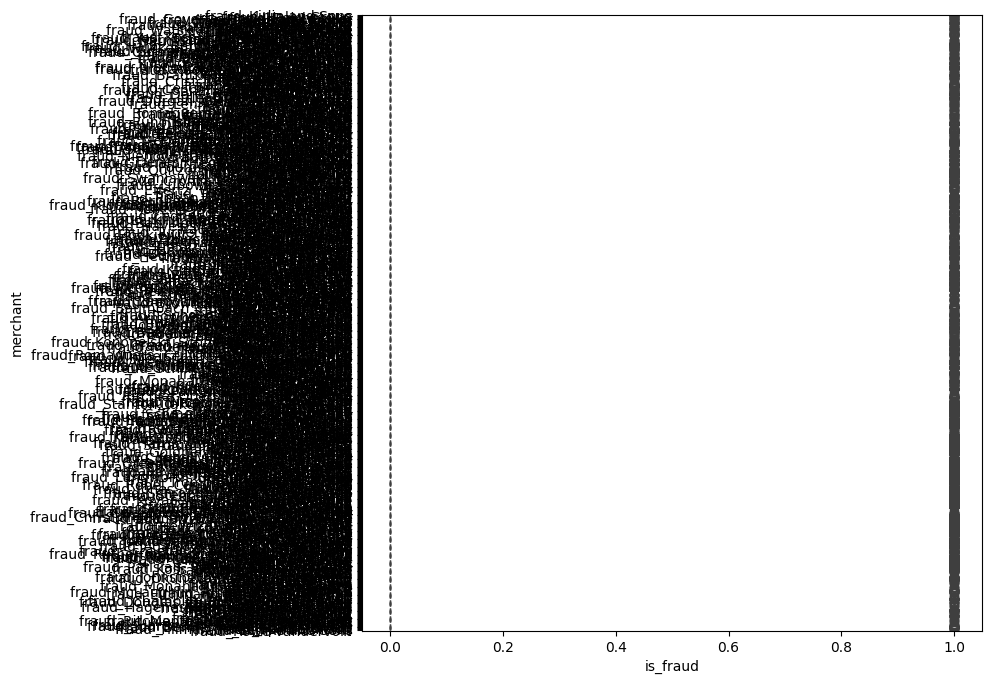

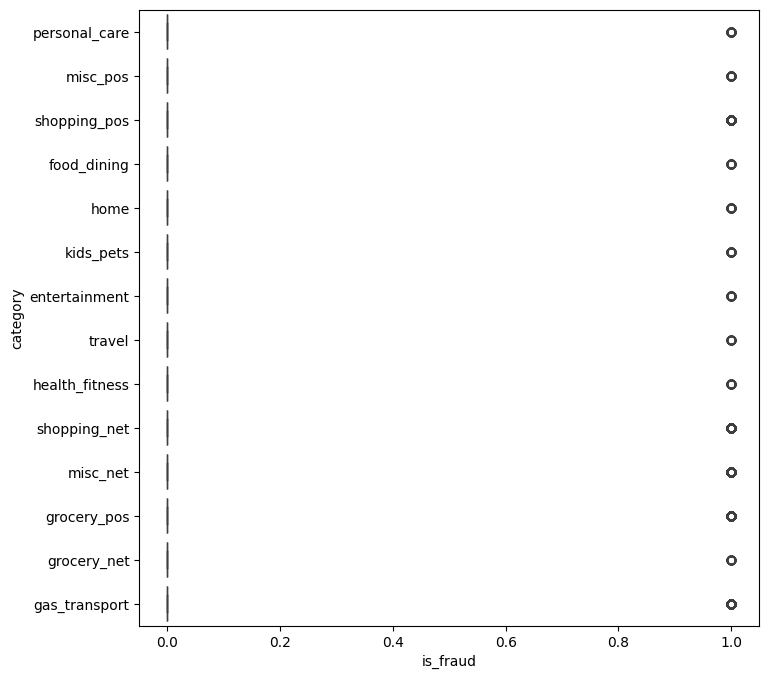

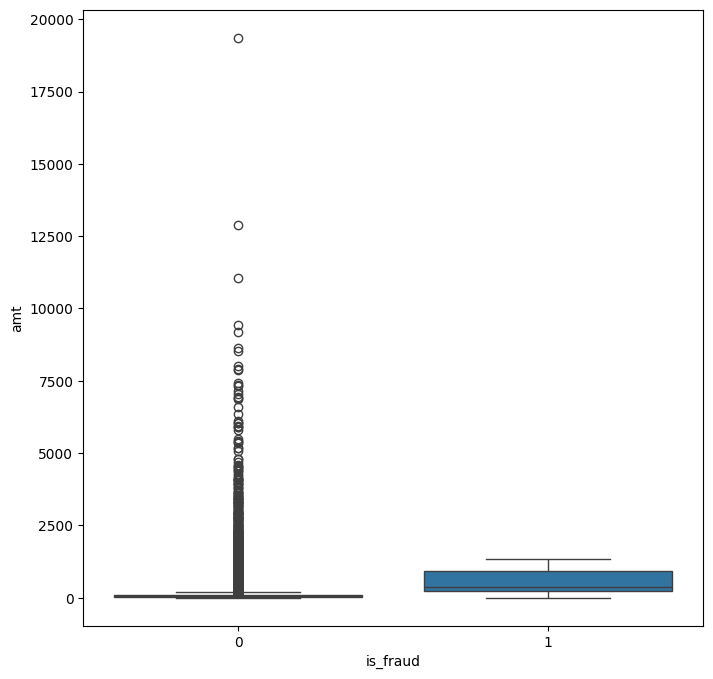

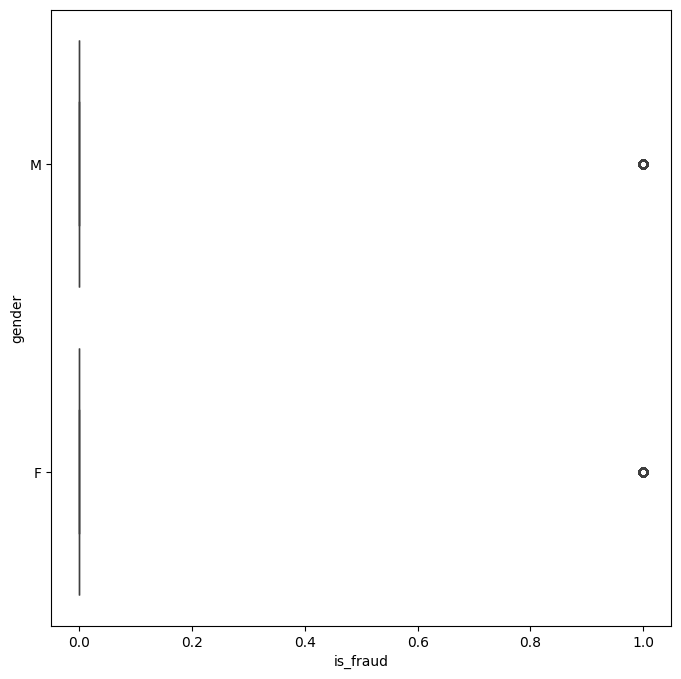

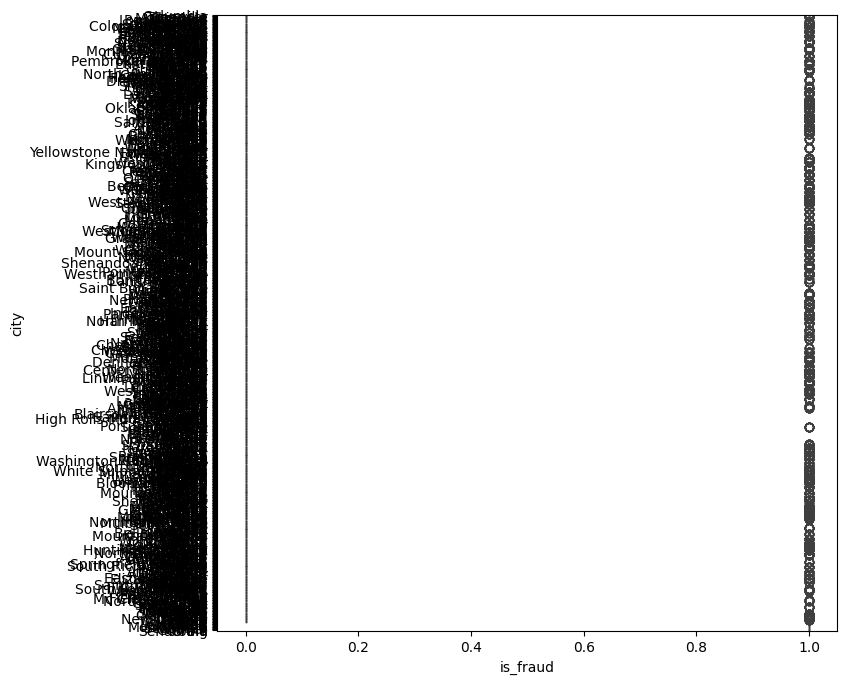

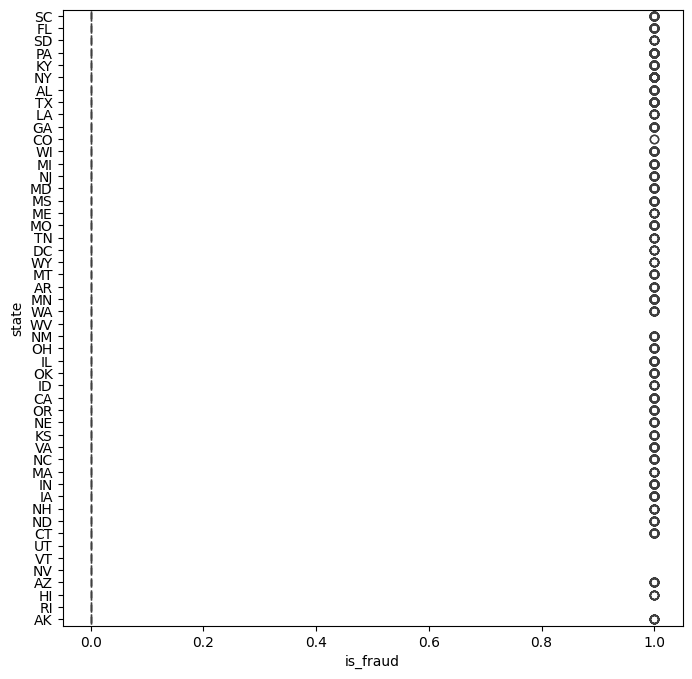

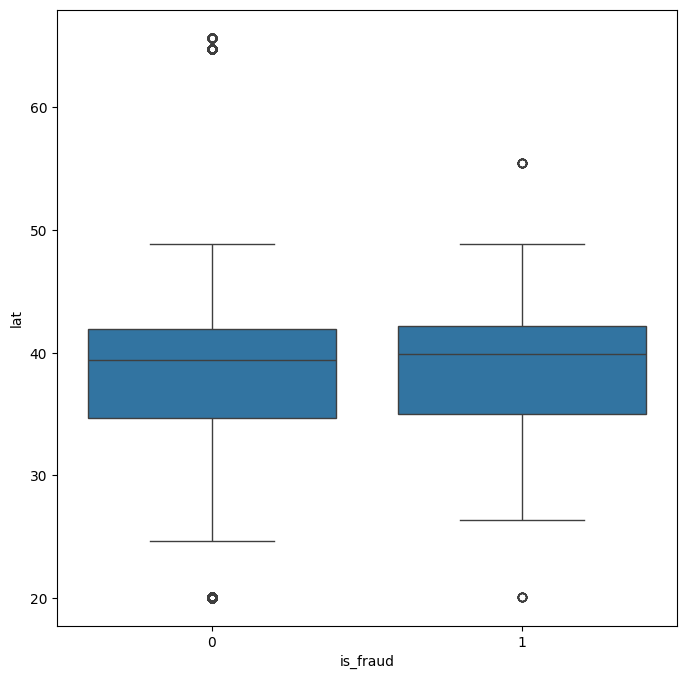

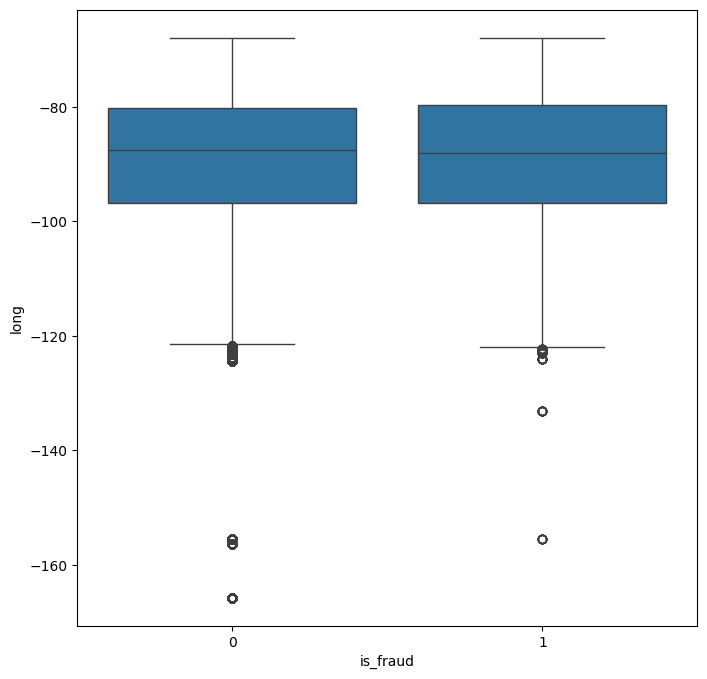

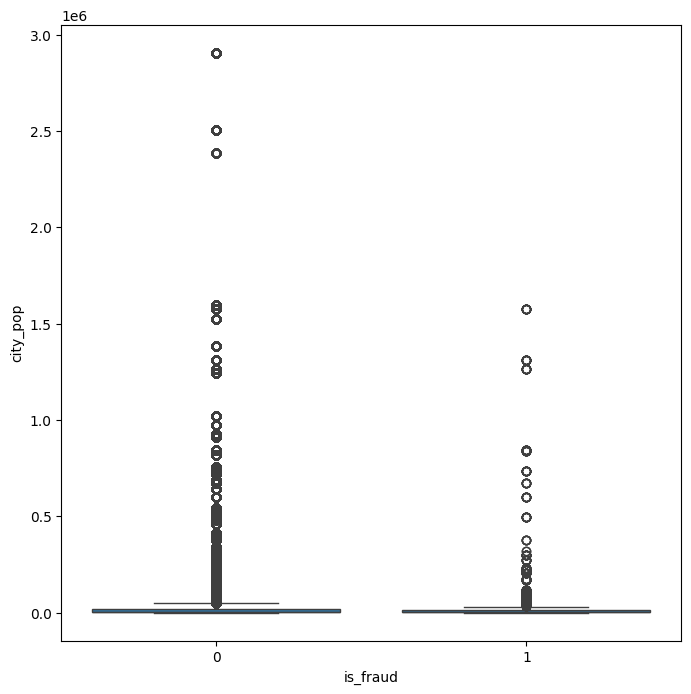

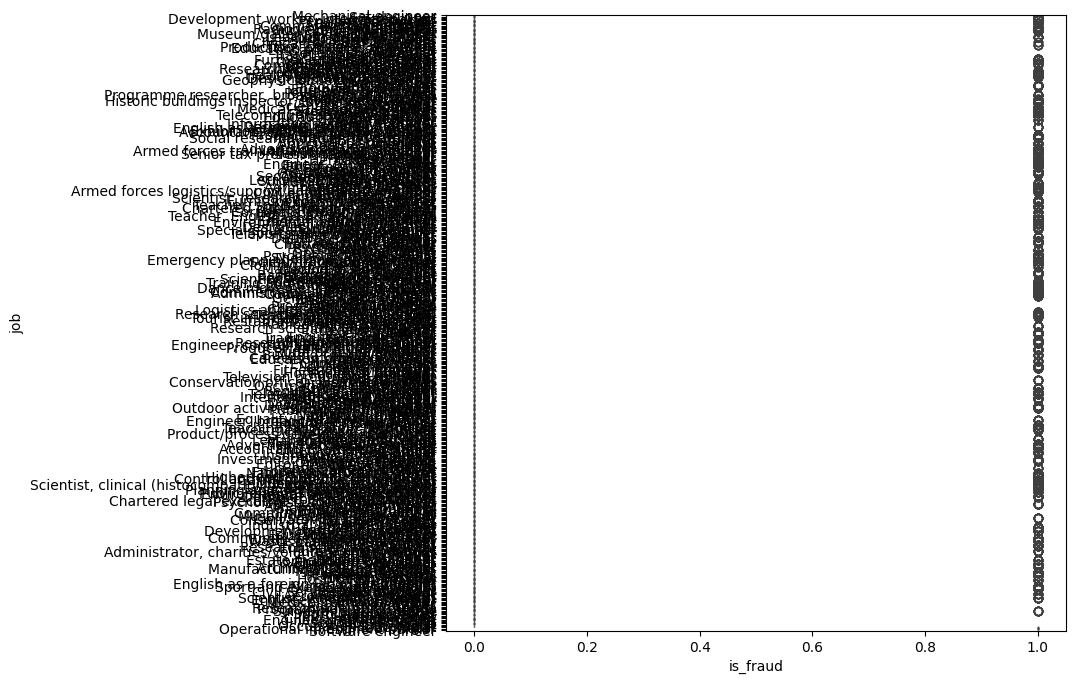

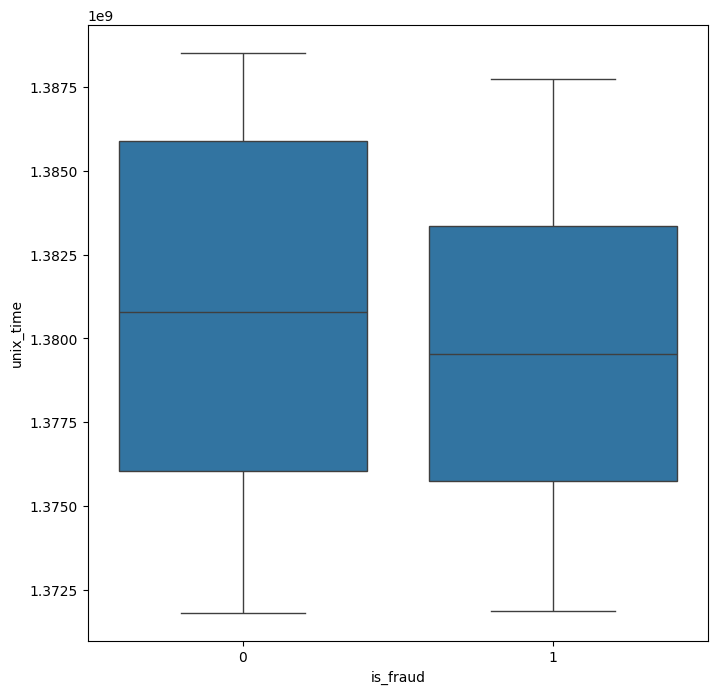

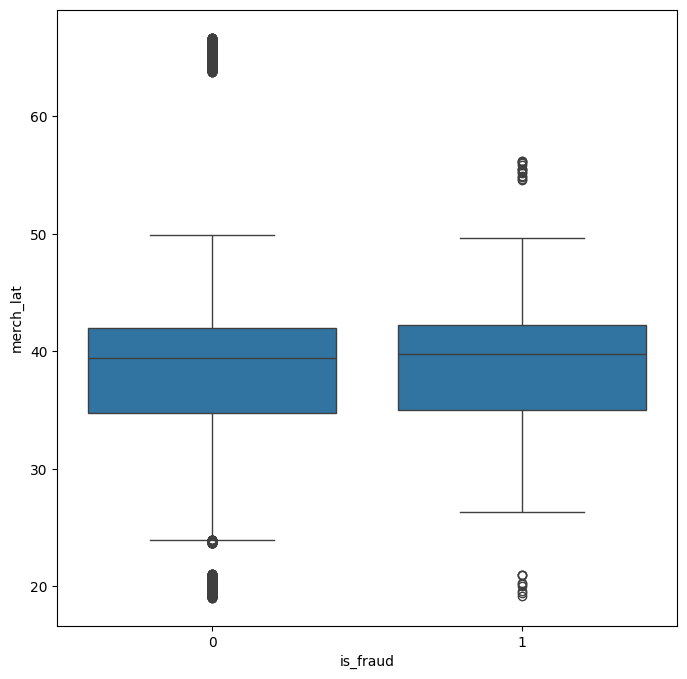

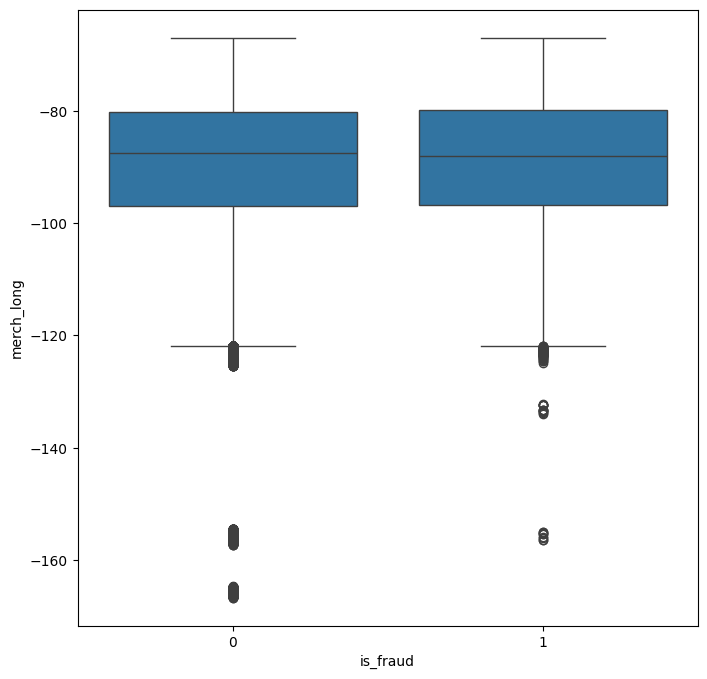

In [ ]:
for attr in df.columns[:-1]:
   plt.figure(figsize=(8,8))
   sns.boxplot(x="is_fraud", y=attr, data=df, whis=1.5)
   plt.show()

Função responsável em retirar os outliers da base de dados

In [ ]:
def removeOutliers(df):
    for attr in df.columns[:-1]:
        # Verifica se o atributo é numérico
        if np.issubdtype(df[attr].dtype, np.number):
            # Calcula os quartis corretamente
            q75, q25 = np.percentile(df[attr].values, [75 ,25])
            # Calcula o IQR
            IQR = q75 - q25
            # Remove os outliers com base no valor do IQR
            df = df[(df[attr] <= (q75 + 1.5 * IQR)) & (df[attr] >= (q25 - 1.5 * IQR))]
    return df

# Remove os outliers
df = removeOutliers(df)

# apresenta as principais estatísticas sobre a base de dados
df.boxplot(figsize=(15,7))
plt.show()

# # matriz de gráficos scatter
sns.pairplot(df, hue='is_fraud', height=3.5);
plt.show()

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from pandas.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

## Criar conjunto de validação

In [ ]:
df.head()

,merchant,category,amt,gender,city,state,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
2,fraud_Reichel LLC,personal_care,10.37,F,Spencer,SD,43.7557,-97.5936,343,"Development worker, international aid",1371816950,44.495498,-97.728453,0
3,"fraud_Goyette, Howell and Collier",shopping_pos,4.37,M,Morrisdale,PA,41.0001,-78.2357,3688,Advice worker,1371816970,41.546067,-78.120238,0
4,"fraud_Feil, Hilpert and Koss",food_dining,7.01,M,Westport,KY,38.4921,-85.4524,564,Pensions consultant,1371816980,38.977546,-84.727994,0
5,fraud_Connelly-Carter,home,2.91,F,Loxahatchee,FL,26.7383,-80.2760,26551,Paramedic,1371817041,26.078460,-80.569932,0
6,fraud_Bechtelar-Rippin,food_dining,7.93,M,Rock Tavern,NY,41.4575,-74.1659,2258,Building surveyor,1371817107,40.711680,-73.668384,0


In [ ]:
df.shape

(209640, 14)

In [ ]:
# Conjunto de Validação
array = df.values
X = array[:,0:13]
Y = array[:,13]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

print(X_train.shape)
print(Y_train.shape)

print(X_validation.shape)
print(Y_validation.shape)

(167712, 13)
(167712,)
(41928, 13)
(41928,)


In [ ]:
# Métricas
seed = 7
scoring = 'accuracy'

In [ ]:
### Regressão Logística (LR)
### Análise Linear Discriminante (LDA)
### K-vizinhos mais próximos (KNN)
### Árvores de Classificação (Decision Tree) e Regressão (CART)
### Gaussian Naive Bayes (NB)
### Support Vector Machines (SVM)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Separar as características e o alvo
X = df.drop('is_fraud', axis=1)
y = df['is_fraud']

# Definir as colunas categóricas e numéricas
categorical_features = ['category', 'gender', 'city', 'state', 'job']
numerical_features = ['amt', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long']

# Pipeline de pré-processamento para dados numéricos
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Pipeline de pré-processamento para dados categóricos
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combinar transformações numéricas e categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

def train_and_evaluate_model(model, X_train, X_test, y_train, y_test):
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    print(f"Modelo: {model.__class__.__name__}")
    print("Relatório de Classificação:\n", classification_report(y_test, y_pred))
    print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred))
    print("Acurácia: ", accuracy_score(y_test, y_pred))
    print("-" * 60)

In [ ]:
# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Treinar e avaliar o modelo de Regressão Logística
train_and_evaluate_model(LogisticRegression(max_iter=1000), X_train, X_test, y_train, y_test)

# Treinar e avaliar o modelo de Árvore de Decisão
train_and_evaluate_model(DecisionTreeClassifier(), X_train, X_test, y_train, y_test)

# Treinar e avaliar o modelo K-Nearest Neighbors
train_and_evaluate_model(KNeighborsClassifier(), X_train, X_test, y_train, y_test)

Modelo: LogisticRegression
Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     41840
           1       0.00      0.00      0.00        88

    accuracy                           1.00     41928
   macro avg       0.50      0.50      0.50     41928
weighted avg       1.00      1.00      1.00     41928

Matriz de Confusão:
 [[41840     0]
 [   88     0]]
Acurácia:  0.997901163900019
------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Modelo: DecisionTreeClassifier
Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     41840
           1       0.42      0.42      0.42        88

    accuracy                           1.00     41928
   macro avg       0.71      0.71      0.71     41928
weighted avg       1.00      1.00      1.00     41928

Matriz de Confusão:
 [[41788    52]
 [   51    37]]
Acurácia:  0.9975434077466132
------------------------------------------------------------
Modelo: KNeighborsClassifier
Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     41840
           1       0.44      0.05      0.08        88

    accuracy                           1.00     41928
   macro avg       0.72      0.52      0.54     41928
weighted avg       1.00      1.00      1.00     41928

Matriz de Confusão:
 [[41835     5]
 [   84     4]]
Acurácia:  0.997877313489792
----

## Mock de teste

In [3]:
input_data = pd.DataFrame({
    'category': ['shopping'],
    'amt': [100.0],
    'gender': ['F'],
    'city': ['Los Angeles'],
    'state': ['CA'],
    'lat': [34.0522],
    'long': [-118.2437],
    'city_pop': [3970000],
    'job': ['engineer'],
    'unix_time': [1371813037],
    'merch_lat': [34.0602],
    'merch_long': [-118.2487]
})

In [ ]:
# Fazer previsão com os dados de entrada usando o modelo de Regressão Logística
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression(max_iter=1000))])
pipeline.fit(X_train, y_train)
prediction = pipeline.predict(input_data)

Previsão (Regressão Logística): [0]


## Salvando o arquivo

In [ ]:
import joblib

# Salvar o modelo
joblib.dump(pipeline, '/content/drive/My Drive/Treining/model.pkl')

Previsão (Regressão Logística): [0 0 0 ... 0 0 0]


## Predição

In [ ]:
# Fazer predição
from google.colab import drive
drive.mount('/content/drive')

# Carregar o modelo
loaded_model = joblib.load('/content/drive/My Drive/Treining/model.pkl')

prediction = loaded_model.predict(input_data)
print(f'Previsão (Regressão Logística): {prediction}')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Previsão (Regressão Logística): [0]


## Teste local

In [15]:
response = requests.get('http://localhost:8000/dataset/input/1').content

In [16]:
print(response)

b'Internal Server Error'


In [9]:
import json

data = json.loads(response)
transformed_data = {
    'category': [data['category']],
    'amt': [float(data['amt'])],
    'gender': [data['gender']],
    'city': [data['city']],
    'state': [data['state']],
    'lat': [data['lat']],
    'long': [data['long']],
    'city_pop': [int(data['city_pop'])],
    'job': [data['job']],
    'unix_time': [data['unix_time']],
    'merch_lat': [data['merch_iat']],
    'merch_long': [data['merch_long']]
}

input_data = pd.DataFrame(transformed_data)

In [10]:
# Fazer predição
import joblib

# Carregar o modelo
loaded_model = joblib.load('model.pkl')

prediction = loaded_model.predict(input_data)
print(f'Previsão (Regressão Logística): {prediction}')

Previsão (Regressão Logística): [0]


C:\Users\pagna\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator SimpleImputer from version 1.2.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\pagna\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator StandardScaler from version 1.2.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\pagna\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator Pipeline from version 1.2.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at you